In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('flats_wroclaw_final.csv')

In [5]:
df.head()

,room_number,floor_number,floor,prod_year,flat_surface_m2,price_per_m2,price,district,building_type
0,2,7,4,2022,47.85,9592.0,459000.0,Krzyki,blok
1,4,9,8,2016,212.10,35361.0,7500000.0,Krzyki,blok
2,5,48,8,2012,227.00,23106.0,5245000.0,Stare Miasto,apartamentowiec
3,4,48,9,2012,176.50,27195.0,4800000.0,Stare Miasto,apartamentowiec
4,6,10,9,2021,179.14,20000.0,3582800.0,Krzyki,blok


##### We can see that most of the flats are in the Krzyki

<AxesSubplot:>

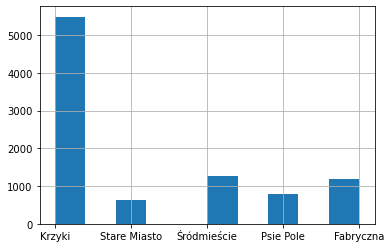

In [6]:
df.district.hist()

#### We can see that all features have outliers 

<AxesSubplot:>

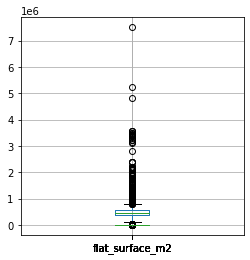

In [21]:
df.boxplot(column=['floor'],figsize=(4,4))
df.boxplot(column=['price'],figsize=(4,4))
df.boxplot(column=['price_per_m2'],figsize=(4,4))
df.boxplot(column=['floor_number'],figsize=(4,4))
df.boxplot(column=['room_number'],figsize=(5,5))
df.boxplot(column=['prod_year'],figsize=(4,4))
df.boxplot(column=['flat_surface_m2'],figsize=(4,4))

#### Graph belowe shows correlations between features
The highest correlation is between flat surface and room number

Text(0.5, 1.0, 'Correlation Heatmap')

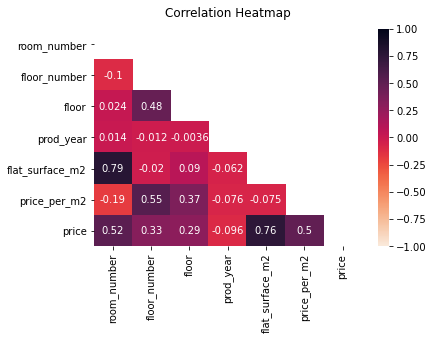

In [36]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
cmap = sns.cm.rocket_r
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=cmap, mask=mask)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

#### All attributes in correlation to price feature
The highest correlation is between price and flat surface which is reasonable

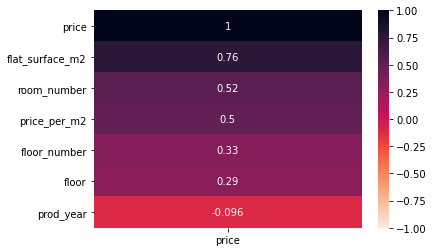

In [41]:
price_corr = sns.heatmap(df.corr()[['price']].sort_values(by='price', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap=cmap)

#### A copule of quick barplots

The most common are flats with three and two rooms,<br>
Most flats are in 4-floors buildings but most of the offers are first floor flats<br>
Another interesting fact is that most common offer district is Krzyki and building type is block<br>
Most of the buildings are build in 2020 or going to be build in 2021

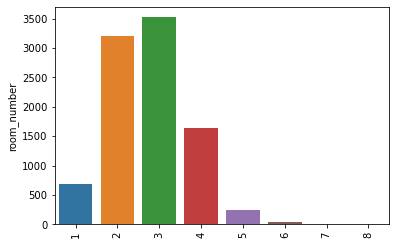

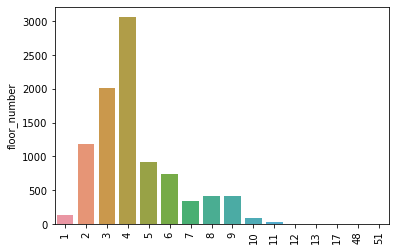

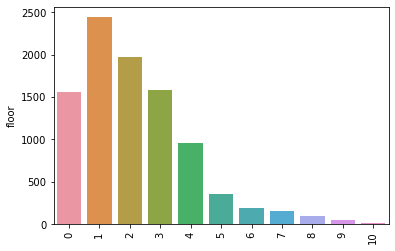

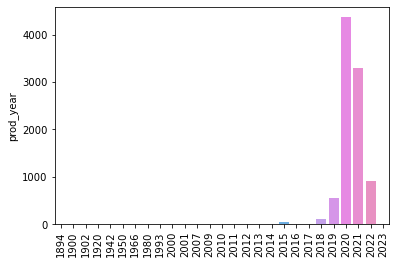

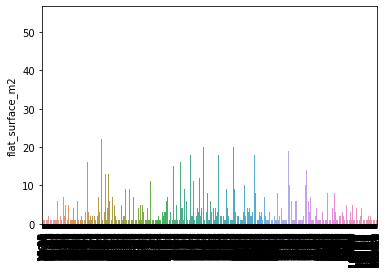

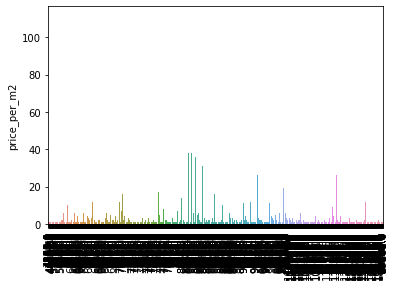

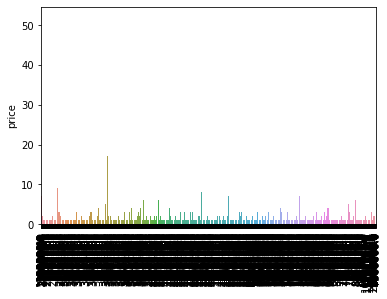

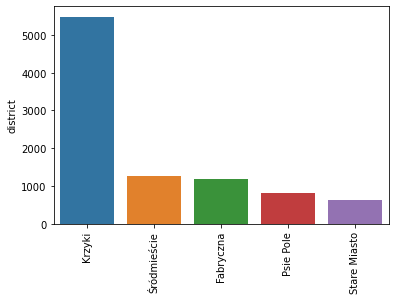

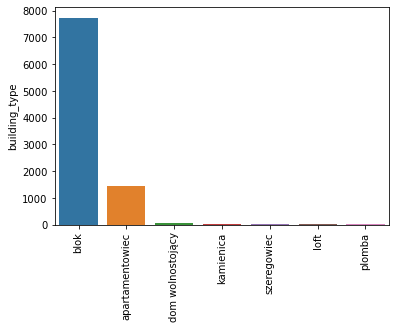

In [50]:
for i in df.columns:
    cat_num = df[i].value_counts()
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

#### Using pivot table we can create all sorts of queries and explore our data
In this query I used mean as an aggro function but there are other possibilities

In [24]:
pd.pivot_table(df, values='flat_surface_m2', index=['district','building_type'], aggfunc=np.amax).round(decimals=0)

flat_surface_m2
district     building_type                    
Fabryczna    apartamentowiec             137.0
             blok                        180.0
             dom wolnostojący             86.0
             kamienica                    59.0
             loft                         57.0
             szeregowiec                 104.0
Krzyki       apartamentowiec             306.0
             blok                        212.0
             dom wolnostojący             88.0
             szeregowiec                 120.0
Psie Pole    apartamentowiec             203.0
             blok                        163.0
             dom wolnostojący             87.0
             kamienica                    44.0
             szeregowiec                  92.0
Stare Miasto apartamentowiec             301.0
             blok                        197.0
             kamienica                   107.0
             loft                        104.0
             szeregowiec                  43.0
Śródmieście  apartamentowiec             215.0
             blok                        280.0
             dom wolnostojący             41.0
             kamienica                   190.0
             loft                        146.0
             plomba                      143.0

#### As we expected flat surface against price shows correlation

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


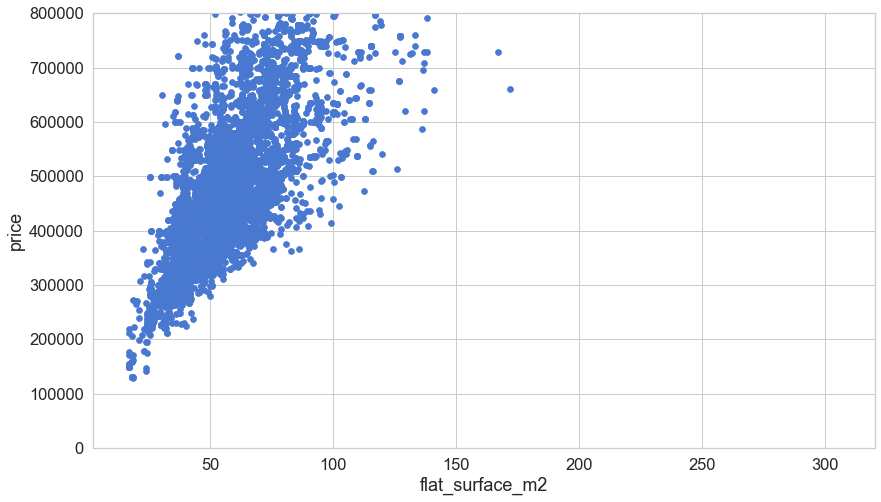

In [33]:
var = 'flat_surface_m2'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,800000), s=32);